In [15]:
import pandas as pd
import matplotlib as mp
import os
import matplotlib.pyplot as plt

In [2]:
f = lambda x : int(x[2:].split('.')[0])
loc='iterations'
iterationsData = [(config, pd.read_csv(os.path.join(loc, config), header=None, names=['solved', 'clauses_solved', 'clauses_total', 'time']))
                  for config in sorted(os.listdir(loc), key=f)]

print(iterationsData[0])

('it50.conf.csv',     solved  clauses_solved  clauses_total     time
0        0             395            430  188.181
1        0             396            430  190.488
2        0             395            430  187.880
3        0             394            430  187.858
4        0             397            430  186.716
..     ...             ...            ...      ...
75       0             207            218   95.609
76       0             208            218  101.494
77       0             205            218  102.617
78       0             206            218   98.261
79       0             208            218   89.773

[80 rows x 4 columns])


In [3]:
def calcError(data):
	for config, df in data:
		df['error'] = df.apply(lambda row: 1 - row['clauses_solved']/row['clauses_total'], axis=1)
		print(config, df['error'].mean() , df['time'].mean())


In [4]:
calcError(iterationsData)

it50.conf.csv 0.059250876870089585 186.193075
it100.conf.csv 0.05452228604018128 333.4936875
it200.conf.csv 0.0499879225212594 637.697225
it750.conf.csv 0.04173440624875445 2286.333525
it1000.conf.csv 0.041196452896367544 2997.5079499999997
it2000.conf.csv 0.038315849661326506 5978.2978


In [5]:
f = lambda x : int(x[2:].split('.')[0])
loc='population'
populationData = [(config, pd.read_csv(os.path.join(loc, config), header=None, names=['solved', 'clauses_solved', 'clauses_total', 'time']))
                  for config in sorted(os.listdir(loc), key=f)]
calcError(populationData)


it50.conf.csv 0.053833072597340784 276.0354625
it100.conf.csv 0.048925290492524316 681.2561
it200.conf.csv 0.04450193075539779 1540.8811375
it500.conf.csv 0.03887710952904574 4355.7837125
it1000.conf.csv 0.03577354917857904 8936.751937500001


In [6]:
f = lambda x : int(x[2:].split('.conf')[0])
loc='elitism'
elitismData = [(config, pd.read_csv(os.path.join(loc, config), header=None, names=['solved', 'clauses_solved', 'clauses_total', 'time']))
                  for config in sorted(os.listdir(loc), key=f)]
calcError(elitismData)


it25.conf.csv 0.04750294683447552 1525.1547125000002
it50.conf.csv 0.045661031682207275 1629.0825375
it70.conf.csv 0.04349406061188651 1578.035725
it80.conf.csv 0.04450193075539779 1548.13475
it90.conf.csv 0.043814790793801885 1489.133325


In [7]:
f = lambda x : int(x[2:].split('.conf')[0])
loc='chromosomeChangeRate'
mutationRateData = [(config, pd.read_csv(os.path.join(loc, config), header=None, names=['solved', 'clauses_solved', 'clauses_total', 'time']))
                  for config in sorted(os.listdir(loc), key=f)]
calcError(mutationRateData)


it1.conf.csv 0.037624575925461354 6803.044187499999
it3.conf.csv 0.038060622437089256 7299.2703624999995
it5.conf.csv 0.03972013278485968 7469.71615
it10.conf.csv 0.04159222844575948 7778.316612499999
it20.conf.csv 0.04369625946914189 8041.854724999999


In [8]:
loc='best'
testData = [(config, pd.read_csv(os.path.join(loc, config), header=None, names=['solved', 'clauses_solved', 'clauses_total', 'time']))
                  for config in sorted(os.listdir(loc))]

In [9]:
testError = [ (config,
				df.apply(lambda row: 1 - row['clauses_solved']/row['clauses_total'], axis=1).mean(),
				df['time'].mean(),
				) for config, df in testData]

In [10]:
print(testError)

[('CBS_k3_n100_m423_b30.csv', 0.046926713947990514, 6906.365), ('hanoi.csv', 0.14519881960821185, 120649.4), ('ii.csv', 0.41948566044324664, 69722.57000000002), ('train.csv', 0.037624575925461354, 6717.747687499999)]


In [11]:
for config, df in testData:
	if config != 'train.csv' :
		continue
	for c in df['clauses_total'].unique():
		print(c)
		print(df[df['clauses_total'] == c]['time'].mean())
		print(1 - (df[df['clauses_total'] == c]['clauses_solved'].mean() /c))
		print()

430
6968.065
0.05058139534883721

91
786.43725
0.001098901098900984

860
15594.925
0.07244186046511625

218
3521.5635
0.026376146788990806



Text(0.5, 1.0, 'progress of the population')

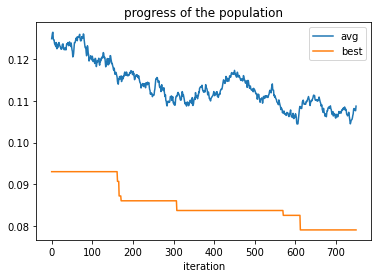

In [22]:
eachIteration = pd.read_csv('eachIteration/data.csv')
eachIteration['avg'] = eachIteration['avg'].apply(lambda score: 1-score/860)
eachIteration['best'] = eachIteration['best'].apply(lambda score: 1-score/860)
plt.plot(eachIteration['it'], eachIteration['avg'], label='avg')
plt.plot(eachIteration['it'], eachIteration['best'], label='best')
plt.legend()
plt.ylabel('error')
plt.xlabel('iteration')
plt.title('progress of the population')